# Machine Learning Models - Chad R. - Linear Regression, Types of Regression, and the Progression of Diabetes within a Year

# Linear Regression

In [7]:
import numpy as np
from sklearn.datasets import load_diabetes #The Data Set
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

In [8]:
#splitting the data into training and testing sets, making sure to select the first feature only
X, y = load_diabetes(return_X_y=True)
X = X[:, [0]]
#train-test split. Selecting first 40 samples for training and last 40 for testing
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=40, test_size=40, shuffle=False)

Using the ordinary least square error to fit a linear regression model. 


Coefficients: [149.94060574 142.14820865]
Mean Squared Error: 4313.307887069813


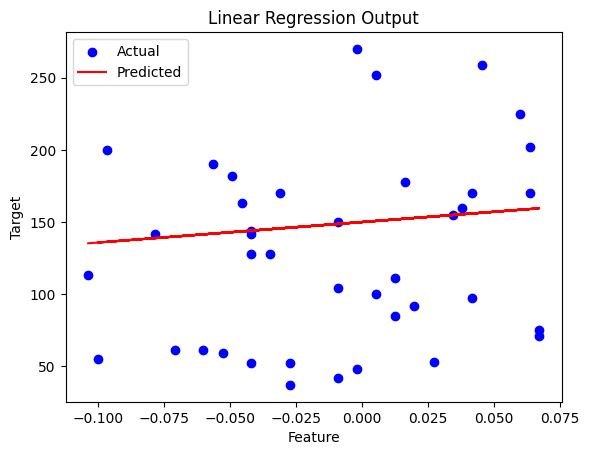

In [16]:
# calculate coefficients 
x_train_bias = np.c_[np.ones(X_train.shape[0]), X_train]  # Add bias term
x_test_bias = np.c_[np.ones(X_test.shape[0]), X_test]  # Add bias term

# compute weights: w = (X^T * X)^(-1) * X^T * y
w = np.linalg.inv(x_train_bias.T @ x_train_bias) @ x_train_bias.T @ y_train

# predict on test data
y_pred = x_test_bias @ w

# calculates the mean squared error
mse = np.mean((y_test - y_pred) ** 2)

# reports coefficients and mean squared error
print("Coefficients:", w)
print("Mean Squared Error:", mse)


# plots the outputs
plt.scatter(X_test, y_test, color='blue', label='Actual')
plt.plot(X_test, y_pred, color='red', label='Predicted')
plt.xlabel('Feature')
plt.ylabel('Target')
plt.legend()
plt.title('Linear Regression Output')
plt.show()

Using the Lasso regularization to fit a linear regression model.

Lasso Regression Coefficients: [2.08101197]
Lasso Regression Bias: 148.56105312866035
Lasso Regression Mean Squared Error: 4435.4587253179825


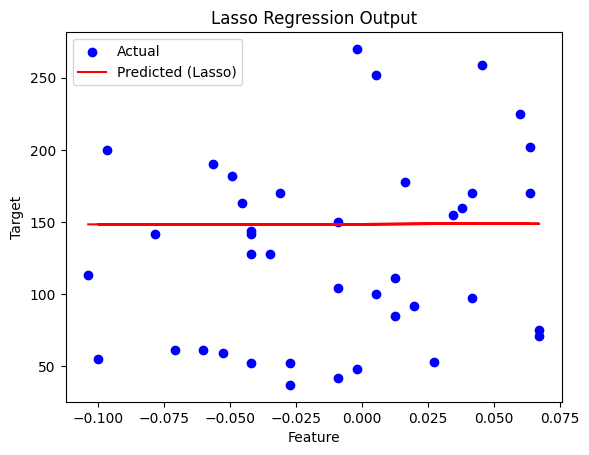

In [10]:
def lasso_regression(X, y, learning_rate=0.01, lambda_param=0.1, iterations=1000):
    n_samples, n_features = X.shape
    
    # initializes weights and bias
    weights = np.zeros(n_features)
    bias = 0
    # gradient descent
    for _ in range(iterations):
        y_predicted = np.dot(X, weights) + bias
        # calculates gradients with L1 regularization
        dw = (1/n_samples) * np.dot(X.T, (y_predicted - y)) + lambda_param * np.sign(weights)
        db = (1/n_samples) * np.sum(y_predicted - y)
        # updates weights and bias
        weights -= learning_rate * dw
        bias -= learning_rate * db
        
    return weights, bias

def predict(X, weights, bias):
    return np.dot(X, weights) + bias
# fits the L1 model
weights, bias = lasso_regression(X_train, y_train, learning_rate=0.01, lambda_param=0.1, iterations=1000)
# makes predictions on the test set
y_pred_lasso = predict(X_test, weights, bias)
# calculates mean squared error
mse_lasso = np.mean((y_test - y_pred_lasso) ** 2)
# reports coefficients and mean squared error
print("Lasso Regression Coefficients:", weights)
print("Lasso Regression Bias:", bias)
print("Lasso Regression Mean Squared Error:", mse_lasso)
# plots the output
plt.scatter(X_test, y_test, color='blue', label='Actual')
plt.plot(X_test, y_pred_lasso, color='red', label='Predicted (Lasso)')
plt.xlabel('Feature')
plt.ylabel('Target')
plt.legend()
plt.title('Lasso Regression Output')
plt.show()

Using the Ridge regularization to fit a linear regression model.

Ridge Regression Coefficients: [75.37946082]
Ridge Regression Bias: 149.28742125906675
Ridge Regression Mean Squared Error: 4360.393064537551


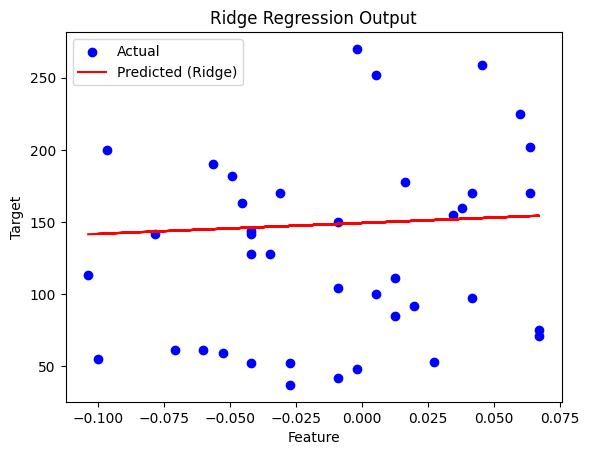

In [11]:
def ridge_regression(X, y, lambda_param=0.1):
    n_samples, n_features = X.shape
    # bias term addition
    X_b = np.c_[np.ones((n_samples, 1)), X]
    # identity matrix
    I = np.identity(n_features + 1)
    I[0,0] = 0  
    # closed-form solution for Ridge Regression
    weights = np.linalg.inv(X_b.T @ X_b + lambda_param * I) @ X_b.T @ y
    return weights
def predict(X, weights):
    X_b = np.c_[np.ones((X.shape[0], 1)), X]
    return X_b @ weights
# fits the Ridge Regression model
lambda_param = 0.1  # You can tune this parameter
ridge_weights = ridge_regression(X_train, y_train, lambda_param)
# makes predictions on the test set
y_pred_ridge = predict(X_test, ridge_weights)
# calculates mean squared error
mse_ridge = np.mean((y_test - y_pred_ridge) ** 2)
# reports coefficients and mean squared error
print("Ridge Regression Coefficients:", ridge_weights[1:])  # Exclude bias term
print("Ridge Regression Bias:", ridge_weights[0])
print("Ridge Regression Mean Squared Error:", mse_ridge)
# plots the output
plt.scatter(X_test, y_test, color='blue', label='Actual')
plt.plot(X_test, y_pred_ridge, color='red', label='Predicted (Ridge)')
plt.xlabel('Feature')
plt.ylabel('Target')
plt.legend()
plt.title('Ridge Regression Output')
plt.show()

4. "Please plot the Ridge Coefficients as a function of the regularizaiton"

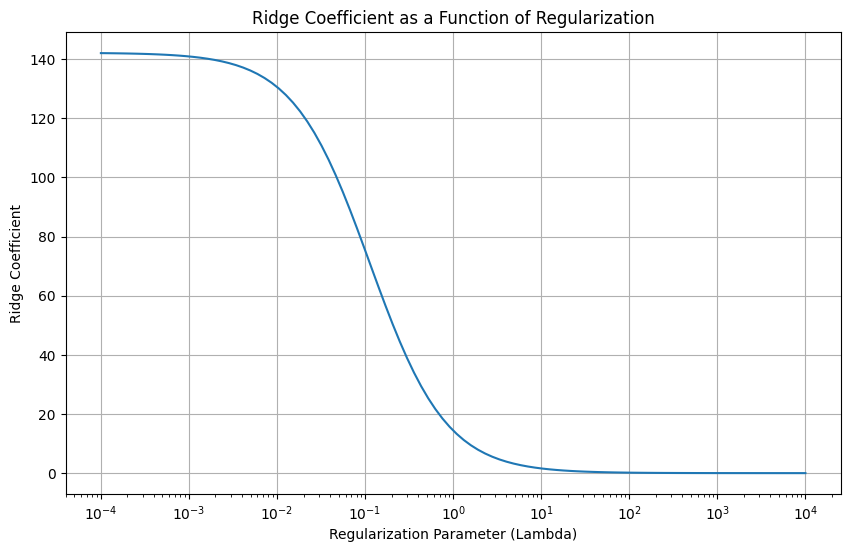

In [12]:
lambda_values = np.logspace(-4, 4, 100)

# stores Ridge coefficients for each lambda
coefficients = []

# calculates the Ridge coefficients for each lambda value
for lambda_param in lambda_values:
    weights = ridge_regression(X_train, y_train, lambda_param)
    coefficients.append(weights[1])  # stores only the feature coefficient, excluding the bias

# plots the Ridge coefficients as a function of lambda
plt.figure(figsize=(10, 6))
plt.plot(lambda_values, coefficients)
plt.xscale('log')  # logarithmic scale for lambda values
plt.xlabel('Regularization Parameter (Lambda)')
plt.ylabel('Ridge Coefficient')
plt.title('Ridge Coefficient as a Function of Regularization')
plt.grid(True)
plt.show()